# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import requests 

from scipy.stats import linregress
import time

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started codeA

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
   
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    record_count += 1

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | st. john's
Processing Record 3 of Set 1 | toga village
City not found. Skipping...
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | chala
Processing Record 10 of Set 1 | whitehorse
Processing Record 11 of Set 1 | metlili chaamba
Processing Record 12 of Set 1 | glendive
Processing Record 13 of Set 1 | motueka
Processing Record 14 of Set 1 | zouerate
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 |

In [8]:
# Test with a single known city
test_city = "London"
city_url = f"{url}appid={weather_api_key}&q={test_city}&units={units}"

response = requests.get(city_url)
print(f"Response for {test_city}: {response.text}")  # Log the raw response

if response.status_code == 200:
    city_weather = response.json()
    print(city_weather)  # Print the parsed JSON data
else:
    print(f"Failed to retrieve data for {test_city}. Status code: {response.status_code}")

Response for London: {"coord":{"lon":-0.1257,"lat":51.5085},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":9.55,"feels_like":9.55,"temp_min":7.77,"temp_max":11.11,"pressure":1029,"humidity":90,"sea_level":1029,"grnd_level":1024},"visibility":10000,"wind":{"speed":0,"deg":0},"clouds":{"all":100},"dt":1730335898,"sys":{"type":2,"id":2075535,"country":"GB","sunrise":1730357563,"sunset":1730392521},"timezone":0,"id":2643743,"name":"London","cod":200}
{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 9.55, 'feels_like': 9.55, 'temp_min': 7.77, 'temp_max': 11.11, 'pressure': 1029, 'humidity': 90, 'sea_level': 1029, 'grnd_level': 1024}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 100}, 'dt': 1730335898, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1730357563,

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_df = pd.DataFrame(city_data)

# Show Record Count
city_df.count()

City          604
Lat           604
Lng           604
Max Temp      604
Humidity      604
Cloudiness    604
Wind Speed    604
Country       604
Date          604
dtype: int64

In [10]:
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.25,85,32,12.17,TF,1730335463
1,st. john's,47.5649,-52.7093,1.20,82,40,1.03,CA,1730335299
2,kodiak,57.7900,-152.4072,5.73,56,0,2.57,US,1730335466
3,longyearbyen,78.2186,15.6401,-7.09,63,20,3.09,SJ,1730335467
4,punta arenas,-53.1500,-70.9167,11.06,58,0,4.12,CL,1730334888


---

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

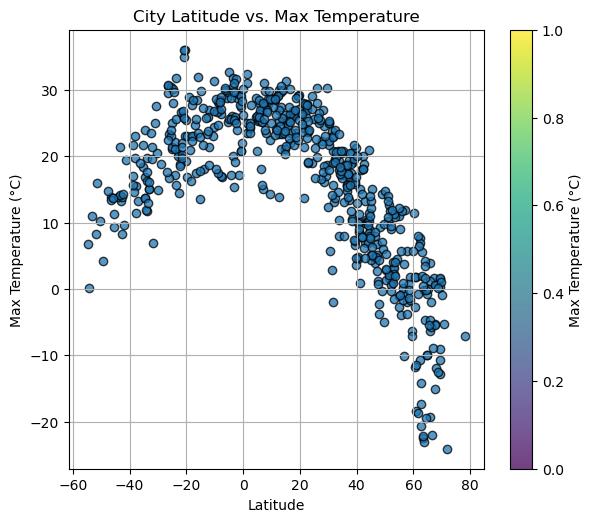

In [14]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(6.7, 5.7))  # Equivalent to 640x480 pixels
plt.scatter(city_df["Lat"], city_df["Max Temp"], edgecolors="black", linewidths=1, alpha=0.75)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.colorbar(label='Max Temperature (°C)')

# Save the figure
plt.savefig("output_data/Fig1.png")
plt.show()

Latitude Vs. Humidity

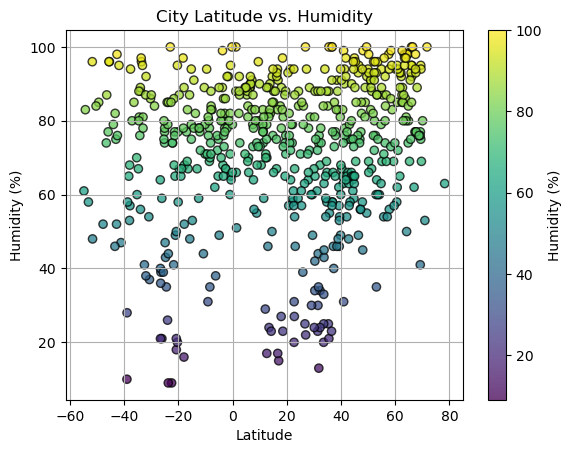

In [17]:
# Create a scatter plot for latitude vs. humidity
plt.figure(figsize=(6.7, 5.7))  # Dimensions: 640x480 pixels
plt.scatter(city_df["Lat"], city_df["Humidity"], 
            edgecolor="black", linewidth=1, alpha=0.75, 
            c=city_df["Humidity"], cmap="viridis")
plt.colorbar(label='Humidity (%)')
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("output_data/Fig2.png")
plt.show()


Latitude Vs. Cloudiness

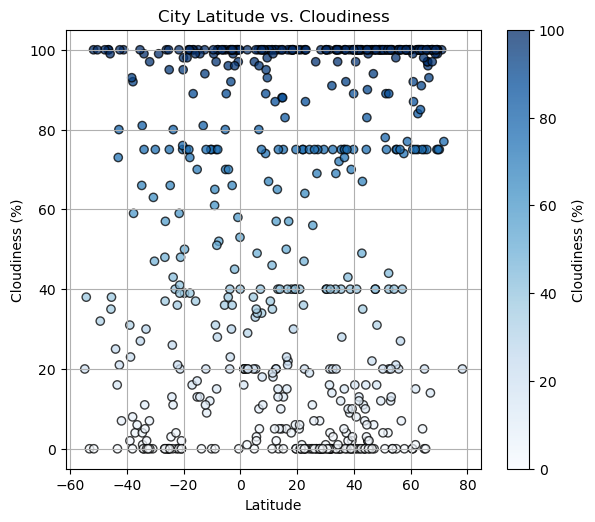

In [18]:
# Create a scatter plot for latitude vs. cloudiness
plt.figure(figsize=(6.7, 5.7))  # Dimensions: 640x480 pixels
plt.scatter(city_df["Lat"], city_df["Cloudiness"], 
            edgecolor="black", linewidth=1, alpha=0.75, 
            c=city_df["Cloudiness"], cmap="Blues")

# Add titles and labels
plt.colorbar(label='Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the plot as a PNG file
plt.savefig("output_data/Fig3.png")

# Display the plot
plt.show()


Latitude vs. Wind Speed Plot

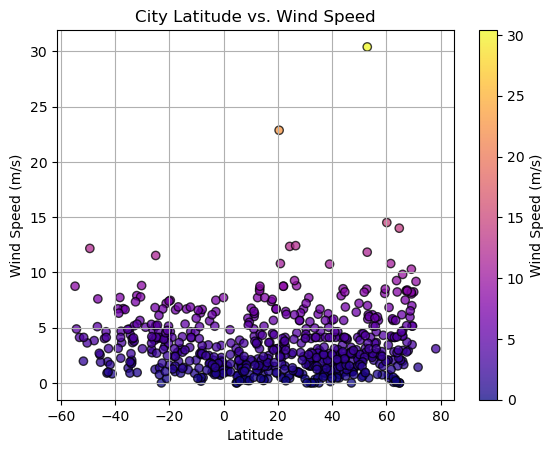

In [19]:
# Create a scatter plot for latitude vs. wind speed
plt.figure(figsize=(6.4, 4.8))  # Dimensions: 640x480 pixels
plt.scatter(city_df["Lat"], city_df["Wind Speed"], 
            edgecolor="black", linewidth=1, alpha=0.75, 
            c=city_df["Wind Speed"], cmap="plasma")
plt.colorbar(label='Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the plot as a PNG file
plt.savefig("output_data/Fig4.png")
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

In [20]:

# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, x_label, y_label, title, filename):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared = r_value**2
    plt.figure(figsize=(6.4, 4.8))
    plt.scatter(x, y, edgecolors="black", linewidths=1, alpha=0.75)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, (x.min() + 5, y.min() + 5), fontsize=12, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    # Print r-squared value
    print(f"The r-squared value is: {r_squared}")

    plt.savefig(filename)
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_df = city_df[city_df['Lat'] >= 0]

north_hem_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,st. john's,47.5649,-52.7093,1.20,82,40,1.03,CA,1730335299
2,kodiak,57.7900,-152.4072,5.73,56,0,2.57,US,1730335466
3,longyearbyen,78.2186,15.6401,-7.09,63,20,3.09,SJ,1730335467
7,whitehorse,60.7161,-135.0538,-2.77,85,75,2.06,CA,1730335369
8,metlili chaamba,32.2667,3.6333,19.52,68,0,1.54,DZ,1730335474


In [23]:
# Southern Hemisphere

south_hemi_df = city_df[city_df['Lat'] < 0]

# Display sample data
south_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.25,85,32,12.17,TF,1730335463
4,punta arenas,-53.1500,-70.9167,11.06,58,0,4.12,CL,1730334888
5,avarua,-21.2078,-159.7750,26.03,65,20,7.20,CK,1730335471
6,chala,-7.5833,31.2667,16.85,83,52,0.49,TZ,1730335472
10,motueka,-41.1333,173.0167,19.50,47,100,0.82,NZ,1730335476


Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.7625419867485043


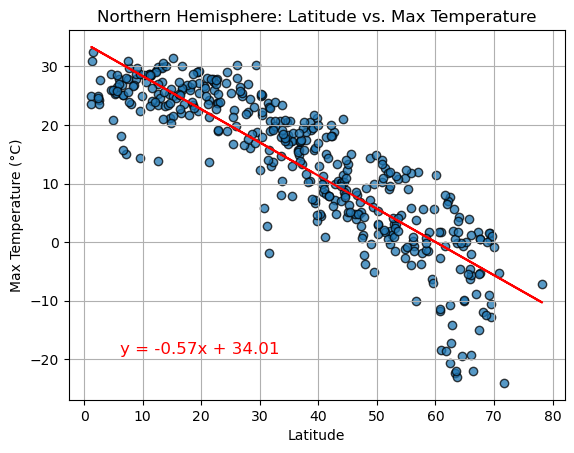

Northern Hemisphere DataFrame sample:
              City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
1       st. john's  47.5649  -52.7093      1.20        82          40   
2           kodiak  57.7900 -152.4072      5.73        56           0   
3     longyearbyen  78.2186   15.6401     -7.09        63          20   
7       whitehorse  60.7161 -135.0538     -2.77        85          75   
8  metlili chaamba  32.2667    3.6333     19.52        68           0   

   Wind Speed Country        Date  
1        1.03      CA  1730335299  
2        2.57      US  1730335466  
3        3.09      SJ  1730335467  
7        2.06      CA  1730335369  
8        1.54      DZ  1730335474  


In [24]:
# Generate a linear regression plot for latitude vs. maximum temperature
linear_regression_plot(north_hem_df['Lat'], north_hem_df['Max Temp'],
                       'Latitude', 'Max Temperature (°C)',
                       'Northern Hemisphere: Latitude vs. Max Temperature',
                       'output_data/Northern_Lat_vs_MaxTemp.png')

# Display sample data
print("Northern Hemisphere DataFrame sample:")
print(north_hem_df.head())


The r-squared value is: 0.44754935466652757


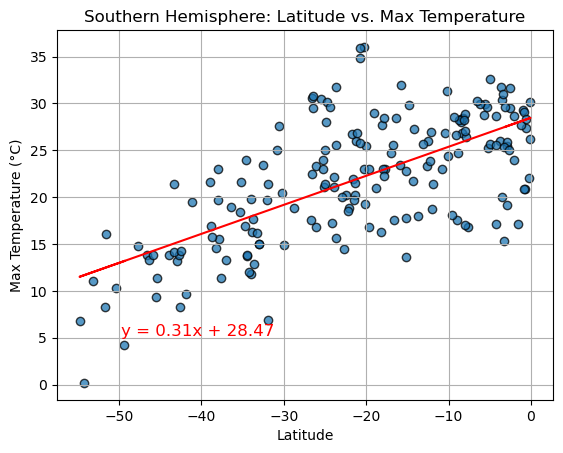

In [25]:
# Linear regression on Southern Hemisphere
linear_regression_plot(south_hemi_df['Lat'], south_hemi_df['Max Temp'],
                       'Latitude', 'Max Temperature (°C)',
                       'Southern Hemisphere: Latitude vs. Max Temperature',
                       'output_data/Southern_Lat_vs_MaxTemp.png')

Discussion about the linear relationship: 

There is a linear relationship between latitude and temperature. This relationship holds true for both hemispheres, north and south.
The r-squared value is not perfect, which indicate other factors affect temperature. 

The r-squared value is: 0.02550987797091781


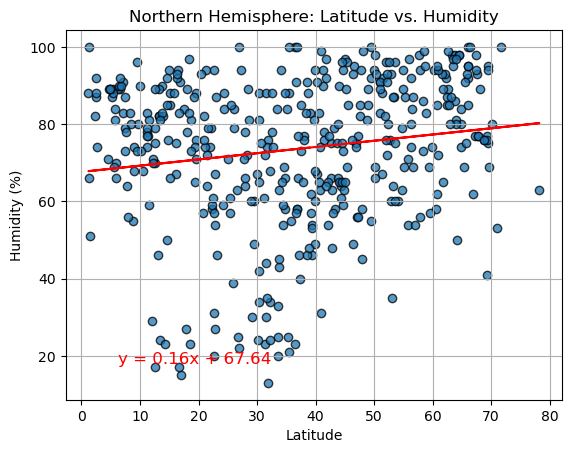

In [26]:
# Northern Hemisphere
# Plot Humidity vs. Latitude for Northern Hemisphere
linear_regression_plot(north_hem_df['Lat'], north_hem_df['Humidity'],
                       'Latitude', 'Humidity (%)',
                       'Northern Hemisphere: Latitude vs. Humidity',
                       'output_data/Northern_Lat_vs_Humidity.png')

The r-squared value is: 0.007140303700011408


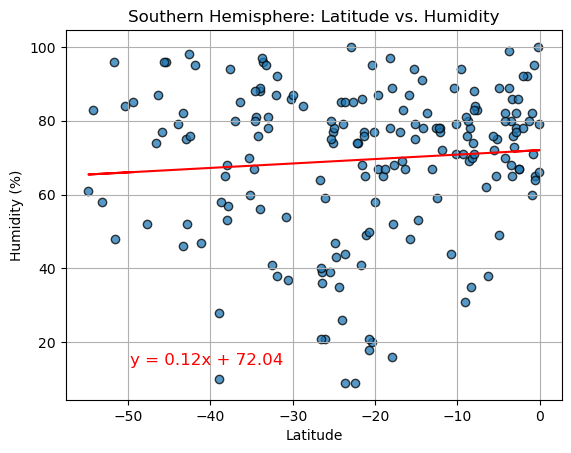

In [27]:
# Southern Hemisphere

# Plot Humidity vs. Latitude for Southern Hemisphere

linear_regression_plot(south_hemi_df['Lat'], south_hemi_df['Humidity'],
                       'Latitude', 'Humidity (%)',
                       'Southern Hemisphere: Latitude vs. Humidity',
                       'output_data/Southern_Lat_vs_Humidity.png')

Discussion about the linear relationship:

In the northern hemisphere, as latitude increases, there is a decrease in humidity. The increase is small.
In the southern hemisphere, as latitude increases, there is an increase in humidity. The increase is also small.

The value of "r" suggests there is a weak relationship between latitude and humidity.


Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.06857567162873156


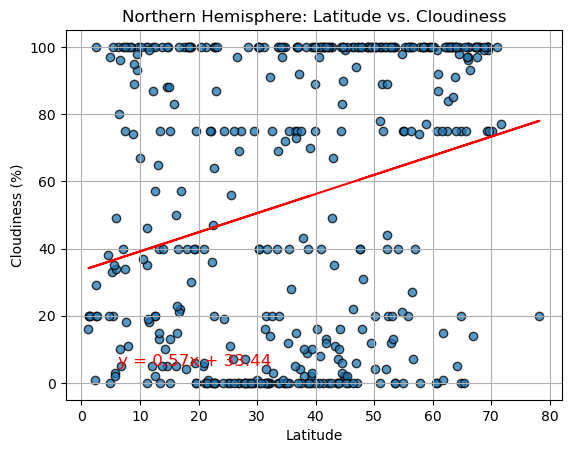

In [28]:
# Northern Hemisphere
# Plot Cloudiness vs. Latitude for Northern Hemisphere
linear_regression_plot(north_hem_df['Lat'], north_hem_df['Cloudiness'],
                       'Latitude', 'Cloudiness (%)',
                       'Northern Hemisphere: Latitude vs. Cloudiness',
                       'output_data/Northern_Lat_vs_Cloudiness.png')

The r-squared value is: 0.07799001167162084


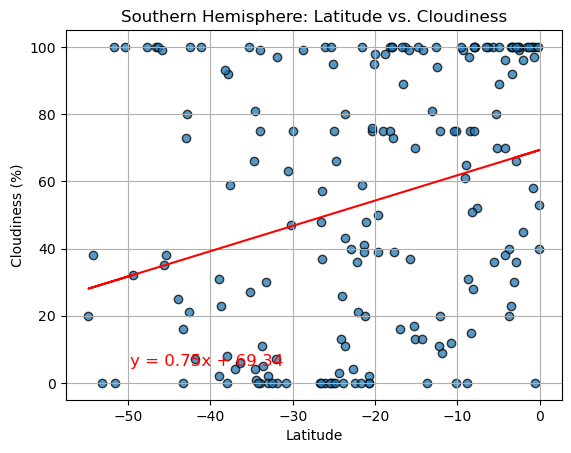

In [29]:
# Plot Cloudiness vs. Latitude for Southern Hemisphere
linear_regression_plot(south_hemi_df['Lat'], south_hemi_df['Cloudiness'],
                       'Latitude', 'Cloudiness (%)',
                       'Southern Hemisphere: Latitude vs. Cloudiness',
                       'output_data/Southern_Lat_vs_Cloudiness.png')

Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.03074490958021372


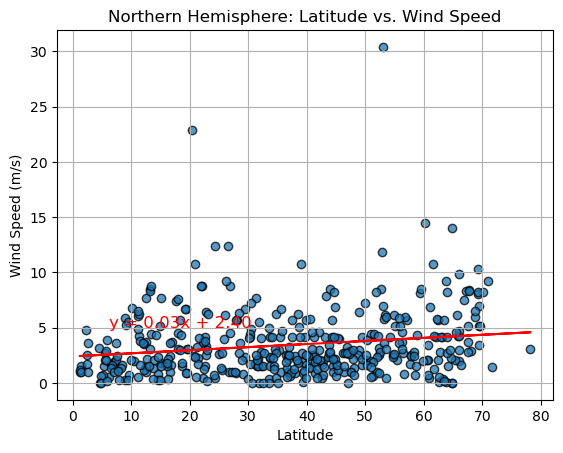

In [30]:
#Northern Hemisphere
linear_regression_plot(north_hem_df['Lat'], north_hem_df['Wind Speed'],
                       'Latitude', 'Wind Speed (m/s)',
                       'Northern Hemisphere: Latitude vs. Wind Speed',
                       'output_data/Northern_Lat_vs_WindSpeed.png')

The r-squared value is: 0.07792308673260762


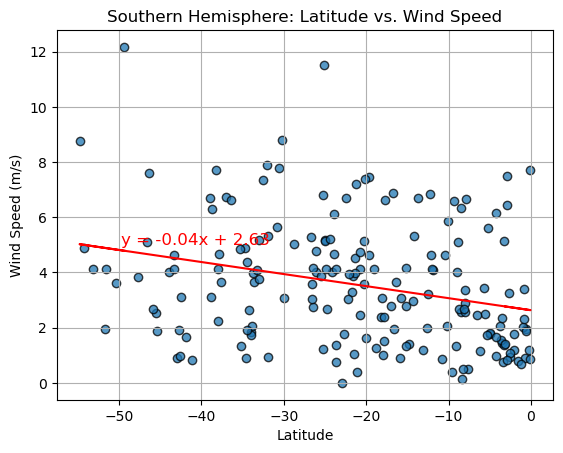

In [31]:
# Southern Hemisphere
linear_regression_plot(south_hemi_df['Lat'], south_hemi_df['Wind Speed'],
                       'Latitude', 'Wind Speed (m/s)',
                       'Southern Hemisphere: Latitude vs. Wind Speed',
                       'output_data/Southern_Lat_vs_WindSpeed.png')

**Discussion about the linear relationship:** YOUR RESPONSE HERE